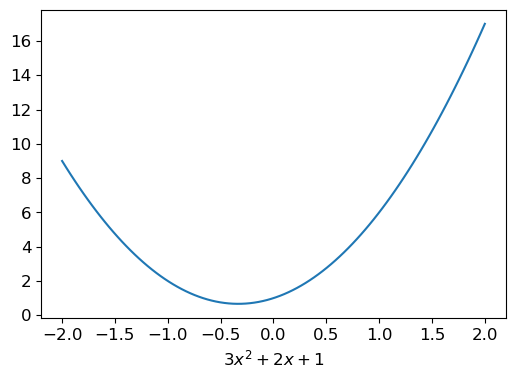

In [3]:
from fastbook import plot_function

def f(x): return 3*x**2 + 2*x + 1

plot_function(f, '$3x^2 + 2x + 1$')


In [4]:
def quad(a,b,c, x): return a*x**2 + b*x + c

quad(3,2,1, 1.5)


10.75

In [5]:
from functools import partial

def mk_quad(a,b,c): return partial(quad, a,b,c)


In [6]:
f = mk_quad(3,2,1)
f(1.5)


10.75

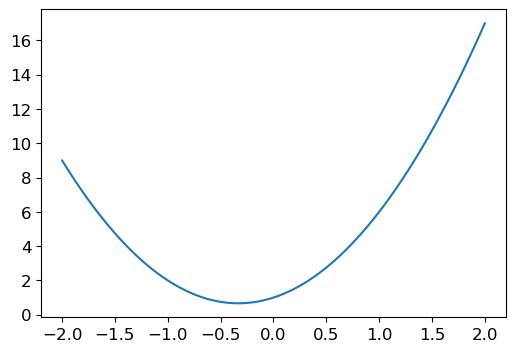

In [7]:
plot_function(f)


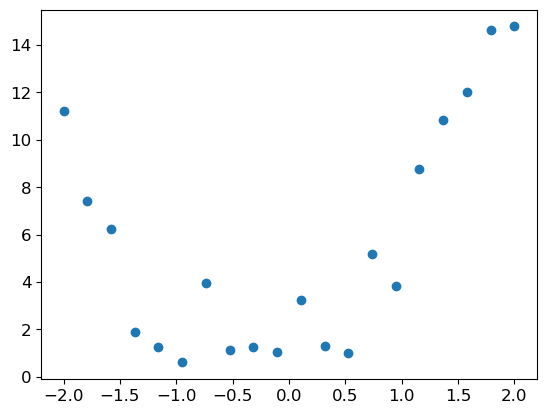

In [29]:
import torch
from fastai.torch_core import tensor
from matplotlib import pyplot as plt

torch.manual_seed(42)

def noise(t,scale=1): return torch.randn(t.shape) * scale
def add_noise(t, mult_scale, add_scale): return t * (1+noise(t,mult_scale)) + noise(t,add_scale)

x = torch.linspace(-2, 2, steps=20)[:,None] # if we needed ints then we could use torch.arange
y = add_noise(f(x), 0.1, 1.5)
plt.scatter(x,y)


In [12]:
?plot_function


Signature:
plot_function(
    f,
    tx=None,
    ty=None,
    title=None,
    min=-2,
    max=2,
    figsize=(6, 4),
)
Docstring: <no docstring>
File:      ~/mambaforge/envs/fastai/lib/python3.11/site-packages/fastbook/__init__.py
Type:      function

In [14]:
def mse(a,b): return ((a-b)**2).mean()


In [15]:
from ipywidgets import interact
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    loss = mse(f(x), y)
    plot_function(f, title=f"MSE: {loss:.2f}")
    plt.scatter(x,y)


interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [38]:
abc = torch.tensor([1.5,1.5,1.5]) # really, these params should be initialized to random values
abc.requires_grad_()

# function that takes parameters and returns loss
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

loss = quad_mse(abc)

# with torch.no_grad():
print(f'abc: {abc}, loss: {loss:.2f}')


abc: tensor([1.5000, 1.5000, 1.5000], requires_grad=True), loss: 9.57


In [39]:
lr = 0.005

for i in range(8):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*lr
    print(f'abc: {abc}, grad: {abc.grad}, loss: {loss:.2f}')


abc: tensor([1.5532, 1.5050, 1.5187], requires_grad=True), grad: tensor([-10.6301,  -0.9996,  -3.7486]), loss: 9.57
abc: tensor([1.6571, 1.5149, 1.5553], requires_grad=True), grad: tensor([-20.7907,  -1.9846,  -7.3030]), loss: 8.95
abc: tensor([1.8073, 1.5296, 1.6076], requires_grad=True), grad: tensor([-30.0338,  -2.9402, -10.4780]), loss: 7.80
abc: tensor([1.9970, 1.5489, 1.6732], requires_grad=True), grad: tensor([-37.9522,  -3.8526, -13.1056]), loss: 6.35
abc: tensor([2.2180, 1.5724, 1.7484], requires_grad=True), grad: tensor([-44.1989,  -4.7081, -15.0429]), loss: 4.84
abc: tensor([2.4605, 1.5999, 1.8293], requires_grad=True), grad: tensor([-48.5019,  -5.4943, -16.1784]), loss: 3.54
abc: tensor([2.7139, 1.6309, 1.9115], requires_grad=True), grad: tensor([-50.6768,  -6.1995, -16.4373]), loss: 2.68
abc: tensor([2.9671, 1.6650, 1.9904], requires_grad=True), grad: tensor([-50.6351,  -6.8134, -15.7850]), loss: 2.40


In [40]:
abc


tensor([2.9671, 1.6650, 1.9904], requires_grad=True)

In [43]:
?torch.clip


Docstring:
clip(input, min=None, max=None, *, out=None) -> Tensor

Alias for :func:`torch.clamp`.
Type:      builtin_function_or_method